# Introductory practical guide to Statistics in Python

While doing research, you have, and will spend a considerable amount of time designing your experiments, executing them, and gathering data. You will then need to draw conclusions - have my experiments found something *significant*? As with everything in science, there is a particular rigour expected in data analysis, which ensures that the conclusions are made based on mathematics, probability, and the odd occurence when your results seem different by chance - and are not demonstrating a real effect. Simply, if you want to claim something, you will often need to determine whether an action you have taken (for example, using an antibiotic, using different reaction conditions, etc.) had a real effect on the outcome of an experiment.

This course will help you build a foundation in statistical analysis using Python, which you can then use in your chemistry (and other) research. You’ll start with two-group comparisons, learning how to use t-tests and non-parametric methods to analyze differences between groups. Next, you will explore what happens when you perform more than one test, and look at multiple hypothesis testing. Finally, you’ll explore ANOVA for comparing multiple groups and multiple factors on which your data might depend.

## Intended learning outcomes
By the end of this course, you will be able to:

* Understand the need for statistical analysis of data 
* Do exploratory data analysis in preparation for statistical analysis
* Conduct statistical tests on simple datasets, including t-tests and ANOVA
* Apply multiple hypothesis testing to control error rates in more complex datasets
* Become confident to explore other statistical methods suited for your unique research needs

# Part 1 - two-group comparisons

### Hypothesis Testing and p-value

Hypothesis testing is a fundamental statistical method used to determine whether there is enough evidence in a sample of data to determine that a certain condition is true for the entire population (for example, if you would measure all penguins (we will use a penguin dataset further on), or do an unlimited number of replicate experiments). In the context of comparing two group means, we typically set up two hypotheses:

* Null Hypothesis (H₀): There is no significant difference between the distribution of the two groups.
* Alternative Hypothesis (H₁): There is a significant difference between the distribution of the two groups.

By doing hypothesis testing, we are trying to show that the null hypothesis is false, which by logic would mean that the alternative hypothesis is true. 

To test this, we usually calculate a p-value, which represents the probability of obtaining results at least as extreme as the observed data, assuming that the null hypothesis is true.

A small p-value (typically less than 0.05, but in medical research, it is often set to 0.01 or even 0.001.) suggests that obtaining such results is not very probable (it would happen with probability equal to the p-value) under the null hypothesis, leading us to reject H₀ and conclude that there is a significant difference between the groups.

A p-value greater than 0.05 suggests insufficient evidence to reject H₀.
It is important to remember though that *not* rejecting H₀ (e.g. having a p-value > 0.05) *does not prove* that there is no significant difference.
This is not what we are testing for.
There is simply not enough evidence to say that there is significant difference - inferring other conclusions is inappropriate.

### Practical application

In this part, we will learn how to compare the means (or distributions) of two groups using statistical tests. As an example, we will be working with a dataset from an [Antarctica penguin survey](https://github.com/allisonhorst/palmerpenguins) which is stored in the *penguin.csv* file accompanying this notebook.

We will compare the body mass (*dependent variable*) between two penguin species (*independent variable*). It is expected that there will be differences in the body mass measured for the penguins in the survey, and our goal is to determine if there is a significant difference across species, i.e. if we can confidently state that the two penguin species have different body masses (which would be a relevant scientific result), or if the observed differences are consistent with random variations in the population.

The steps include:

* Data loading and exploratory data analysis (EDA)
* Visualization techniques for comparing two groups
* Checking assumptions for statistical tests
* Statistical tests: Mann-Whitney U test and Independent t-test
* Interpreting results

## Loading necessary libraries and data

We will use the [pandas library](https://pandas.pydata.org/) so we can use dataframes (a way of storing data), which are more sophisticated versions of numpy arrays and are uniquely suitable for storing data for statistical analysis and transforming large datasets. We will not go into the details of how pandas works here, but there are several [online resources](https://pandas.pydata.org/docs/getting_started/tutorials.html) if you are interested.

In [1]:
# Import numpy and matplotlib into the namespace
from pylab import *

# Import pandas
import pandas as pd

# We will be using some statistical tests implemented in scipy
import scipy.stats

## Data loading and cleaning

We will first load the data from the penguin survey from the CSV file into a pandas dataframe.

In [2]:
penguins=pd.read_csv('penguins.csv')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


You will see that there is data missing for some penguins, with some rows showing NaN instead of a numerical value. This is quite common in many datasets, and the first task is to cleanup the dataset by removing the rows that contain no values.

We will also select the two out of three penguin species that we are interested in comparing.

In [3]:
# Remove rows with missing values
penguins_clean = penguins.dropna()

# Select two species for comparison: Adelie and Gentoo
penguins_two_species = penguins_clean[penguins_clean['species'].isin(['Adelie', 'Gentoo'])]

penguins_two_species

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## Exploratory data analysis

We will now look at the data - so we know what we are analysing.
The first step is to look at the summary statistics for both the species.



In [4]:
# Summary statistics by species
summary_stats = penguins_two_species.groupby('species')['body_mass_g'].describe()
summary_stats

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,146.0,3706.164384,458.620135,2850.0,3362.5,3700.0,4000.0,4775.0
Gentoo,119.0,5092.436975,501.476154,3950.0,4700.0,5050.0,5500.0,6300.0


In the table above, we see the number of data points per species, the mean value (it looks different, but is it?), the standard deviation, minimum and maximum values, and the 1st, 2nd and 3rd quartile values.
While these look different, we cannot say anything about the significance of the difference yet.

Before attempting analysis, let's visualise the data first using box plots

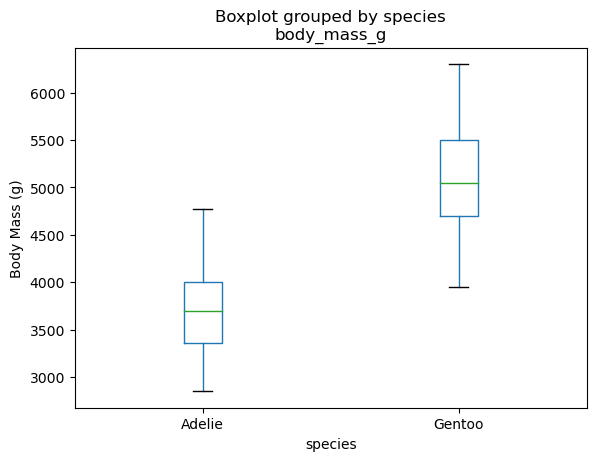

In [5]:
penguins_two_species.boxplot(column=['body_mass_g'],by='species',grid=False)
ylabel('Body Mass (g)')
show()

Now lets look at the data distribution by plotting histograms

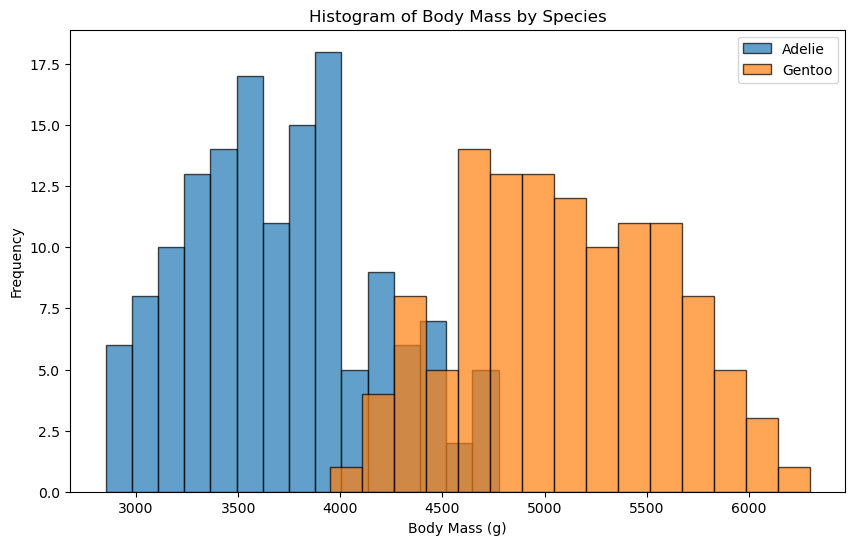

In [6]:
figure(figsize=(10, 6))
hist(penguins_two_species[penguins_two_species['species'] == 'Adelie']['body_mass_g'],bins=15,alpha=0.7,edgecolor='black',label='Adelie')
hist(penguins_two_species[penguins_two_species['species'] == 'Gentoo']['body_mass_g'],bins=15,alpha=0.7,edgecolor='black',label='Gentoo')
title('Histogram of Body Mass by Species')
xlabel('Body Mass (g)')
ylabel('Frequency')
legend()
show()

From the plots above, we can see that the two body mass distributions from our sample *look* different. Regardless of how different the distribution of the sample look, a visual proof is not enough to say if there actually is a difference in body mass between the two penguin species. We need to now perform formal statistical analysis on the data.

### Two group comparisons - data assumptions

For two-group comparisons you would usually use a t-test, which tests the null hypothesis in respect to the means of the distributions. It comes in several variations (for example, for paired and unpaired data).
Paired data is for example a score a particular person got on a test before and after reading a textbook. Unpaired data is any other data where a link between the values in the two datasets is not apparent.

You can only use the t-test if some assumptions about your data are met, or it will produce invalid results:

1. Independence of Observations: The data points in each group must be independent of each other.
2. Normality: The data in each group should be approximately normally distributed, which is especially important for small sample sizes. This can be checked using normality tests (e.g., Shapiro-Wilk test) or visually with Q-Q plots.
3. Homogeneity of Variances: The variances in the two groups should be roughly equal. This can be assessed using tests such as Levene’s test.

If assumptions 2 or 3 are not met, you should use a non-parametric test, such as Mann-Whitney U test. This test does not compare means, rather than that comparing the median and the shape of the distribution.

If assumption 1 is not met, you should use a pairwise t-test or Wilcoxon rank-sum test (see section [Other Special Cases](#other_cases) below).

When these assumptions are met, the t-test is preferred over non-parametric alternatives like the Mann-Whitney U test because it is more statistically powerful. This means that the t-test is more likely to detect a true difference between the group means, given the same sample size. The Mann-Whitney U test does not assume normality and is less affected by outliers, but it typically has less power than the t-test when data are normally distributed and variances are equal. Therefore, when the assumptions of the t-test are met, it provides a more efficient and reliable way to detect differences between groups.

### Checking assumptions

We use the Shapiro-Wilk test to check if the body mass data is normally distributed for each species. The Shapiro-Wilk tests for normality has:
* Null Hypothesis (H₀): The data follows a normal distribution.
* Alternative Hypothesis (H₁): The data does not follow a normal distribution.

If the p-value from the test is < 0.05, it means that we *reject* the null hypothesis, and the data does not follow a normal distribution. If the p-value is ≥ 0.05, we can assume that the data is normally distributed.


In [7]:
scipy.stats.shapiro(penguins_two_species[penguins_two_species['species'] == 'Adelie']['body_mass_g'])

ShapiroResult(statistic=0.9811608195304871, pvalue=0.0423225462436676)

In [8]:
scipy.stats.shapiro(penguins_two_species[penguins_two_species['species'] == 'Gentoo']['body_mass_g'])

ShapiroResult(statistic=0.9860613346099854, pvalue=0.2605295777320862)

We use Levene’s test to check if the variances are equal between the two groups.
This test has:
* Null Hypothesis (H₀): The two distribution's variances are equal.
* Alternative Hypothesis (H₁): The two distribution's variances are not equal.

If the p-value from the test is < 0.05, it means that we *reject* the null hypothesis, and the the two distributions do not have equal variances. If the p-value is ≥ 0.05, we can assume that the two datasets have equal variances.


In [9]:
scipy.stats.levene(penguins_two_species[penguins_two_species['species'] == 'Adelie']['body_mass_g'],
                   penguins_two_species[penguins_two_species['species'] == 'Gentoo']['body_mass_g'])

LeveneResult(statistic=1.9299401700572087, pvalue=0.16594007820292953)

What do we conclude?
Even though the variances are equal, the body mass data for the Adelie species is not normally distributed. Therefore, we cannot use the t-test to determine whether the mean body mass between the two species is significantly different. We will therefore use the Mann-Whitney U test.

#### Note on dealing with non-normally distributed data:

If your data is not normally distributed, instead of using a non-parametric test, you might be able to transform it so it becomes normally distributed. For example, transforming your data with a square root transformation (sqrt(x)), logarithmic transforation (log(x)) or a reciprocal transformation (1/x) might yield a normal distribution, which can be then subjected to, for example, a t-test requiring normality. A [paper from the University of York](https://www-users.york.ac.uk/~mb55/msc/clinbio/week5/transfm_gif.pdf) explores this in depth.

### Testing the difference in the means using the Mann-Whitney U test


In [10]:
scipy.stats.mannwhitneyu(penguins_two_species[penguins_two_species['species'] == 'Adelie']['body_mass_g'],
                         penguins_two_species[penguins_two_species['species'] == 'Gentoo']['body_mass_g'])

MannwhitneyuResult(statistic=358.5, pvalue=4.519356816569977e-41)

What do the results of this test tell us?

Coming back to the theory bit, in the context of comparing two group means, we set up two hypotheses:

* Null Hypothesis (H₀): There is no significant difference between the distributions of the two groups.
* Alternative Hypothesis (H₁): There is a significant difference between the distributions of the two groups.

The p-value from the Mann-Whitney U test helps determine if there is a significant difference between the means of the two species.

* If p < 0.05, we reject the null hypothesis and conclude that there is a significant difference between the groups.
* If p ≥ 0.05, we fail to reject the null hypothesis and conclude that there is no evidence for significant difference between the groups (which again, does not equal to evidence of no difference!)

We can see that the p-value is less than 0.05, so we reject the null hypothesis and can now conclude: **The Gentoo species has significantly greater body mass the Adelie species.**

### What to do if my data does fulfill the t-test assumptions?

While the example data is not normally distributed, and the variances in data are not equal between the two species, your dataset might contain normally distributed data with equal variances.
In that case, you can perform a t-test using the following, or similar code, with the interpretation of the data same as for the Mann-Whitney U test.

    scipy.stats.ttest_ind(penguins_two_species[penguins_two_species['species'] == 'Adelie']['body_mass_g'],
                          penguins_two_species[penguins_two_species['species'] == 'Gentoo']['body_mass_g'])

### Other special cases <a id="other_cases"></a>

The above is a very basic approach. Your data might require a slightly deeper analysis.
For example, let's say that you are researching the effect of students watching a video on their test results, or the effect of a growth hormone treatment on the body mass of mice.
In these cases, you would compare the test result or body mass before and after treatment, with the two groups of data not being independent from each other. You should even know which values in each dataset correspond to the same individuals.

With data like that, you should explore doing a pairwise t-test - provided that your data is normally distributed and of equal variance, or Wilcoxon signed-rank test if not.

One thing you might have noticed is that the body mass histograms generated in the Exploratory Data Analysis for both species look like they might each have two peaks - two local maxima, which could suggest that these distributions are bimodal - or comprised of two (or more) sub-distributions.

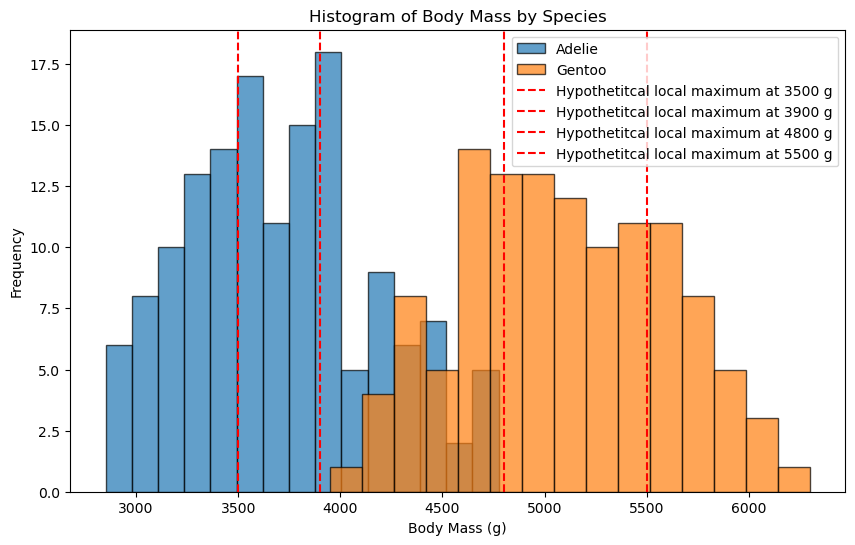

In [11]:
# Same histogram as before
figure(figsize=(10, 6))
hist(penguins_two_species[penguins_two_species['species'] == 'Adelie']['body_mass_g'],bins=15,alpha=0.7,edgecolor='black',label='Adelie')
hist(penguins_two_species[penguins_two_species['species'] == 'Gentoo']['body_mass_g'],bins=15,alpha=0.7,edgecolor='black',label='Gentoo')
title('Histogram of Body Mass by Species')
xlabel('Body Mass (g)')
ylabel('Frequency')

# Add vertical red lines at specified positions
for line in [3500, 3900, 4800, 5500]:
    axvline(x=line, color='red', linestyle='--', label='Hypothetical local maximum at '+str(line)+' g')

legend()
show()

Here, it might be that the males and females within species have distinct body mass distributions.

It is possible to analyse differences between groups based on more than one independent variable: here, we could test variables of *species* and *sex*; and elucidate which of these variables has a significant effect on *body mass*.
It is also possible to analyse differences between more than two groups at once.

In the next part, we will look at what happens when we test more than one hypothesis at the same time.\
In the third part, we will come back to the penguin dataset and explore a statistics method called ANalysis Of VAriance, or in short, ANOVA.

### Practice: Two-group comparision on Iris dataset

The Iris dataset is one of the most famous datasets in the field of data science, originally introduced by British biologist and statistician Ronald A. Fisher in 1936. It is often used for classification and clustering tasks and serves as a benchmark dataset for testing various machine learning algorithms. The dataset is stored in the accompanying *iris.csv* file.

The dataset contains 150 observations of iris flowers, with three different species: Setosa, Versicolor, and Virginica. Each observation is described by the following four numerical features:

1. Sepal.Length: The length of the sepals in centimeters.
2. Sepal.Width: The width of the sepals in centimeters.
3. Petal.Length: The length of the petals in centimeters.
4. Petal.Width: The width of the petals in centimeters.

![Iris flower and variables](image.png)

Additionally, a fifth variable, Species, represents the species of the iris flower (categorical/non-numerical with three levels: Setosa, Versicolor, and Virginica).

The primary goal of this exercise is to explore the relationship between the petal lenght of species of your choice. Do thoso two species have significantly different petal lengths?